In [14]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np


In [15]:
start = datetime(2015, 1, 1)
end = datetime(2024, 8, 21)

[*********************100%%**********************]  1 of 1 completed


Text(0.5, 1.0, 'AMD Returns')

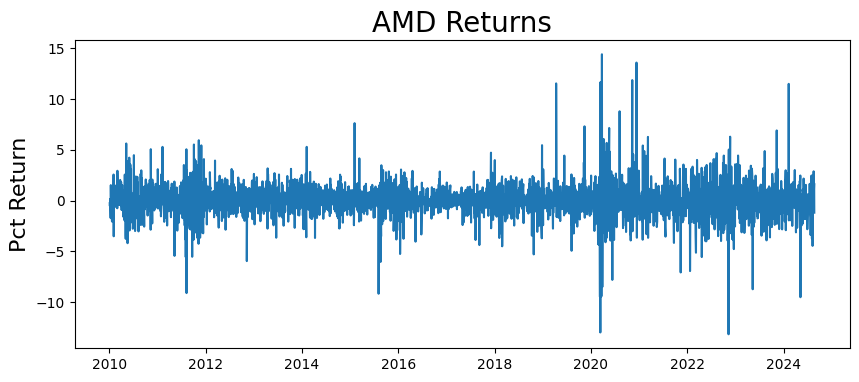

In [38]:
start = '2010-01-01'
end = '2024-08-21'
amd = yf.download('DIS', start=start, end=end)
returns = 100 * amd['Close'].pct_change().dropna()

plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('AMD Returns', fontsize=20)

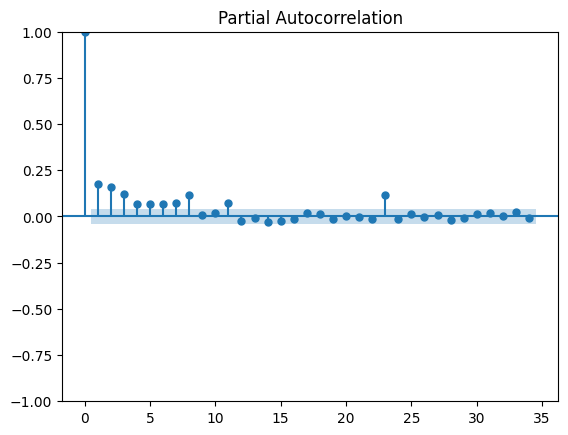

In [17]:
plot_pacf(returns**2)
plt.show()

In [18]:
model = arch_model(returns, p=3, q=3)
model_fit = model.fit()
model_fit.summary()


Iteration:      1,   Func. Count:     10,   Neg. LLF: 11213.612291544794
Iteration:      2,   Func. Count:     24,   Neg. LLF: 8693.331917709274
Iteration:      3,   Func. Count:     36,   Neg. LLF: 6049.983512431163
Iteration:      4,   Func. Count:     47,   Neg. LLF: 5030.8233589998
Iteration:      5,   Func. Count:     58,   Neg. LLF: 4718.594060851921
Iteration:      6,   Func. Count:     69,   Neg. LLF: 4595.94699392865
Iteration:      7,   Func. Count:     79,   Neg. LLF: 4578.799748398944
Iteration:      8,   Func. Count:     89,   Neg. LLF: 4568.039388024515
Iteration:      9,   Func. Count:     99,   Neg. LLF: 4561.156119808602
Iteration:     10,   Func. Count:    109,   Neg. LLF: 4560.2636533680525
Iteration:     11,   Func. Count:    118,   Neg. LLF: 4560.124170712388
Iteration:     12,   Func. Count:    127,   Neg. LLF: 4560.951149828994
Iteration:     13,   Func. Count:    137,   Neg. LLF: 4559.993982902102
Iteration:     14,   Func. Count:    146,   Neg. LLF: 4559.990749

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4559.98
Distribution:                  Normal   AIC:                           9135.97
Method:            Maximum Likelihood   BIC:                           9182.31
                                        No. Observations:                 2423
Date:                Wed, Aug 21 2024   Df Residuals:                     2422
Time:                        13:47:03   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -6.0858e-03  3.464e-02     -0.176      0.861 [-7.397e-02,6.180e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0835  8.418e-02      0.992      0.321 [-8.148e-02,  0.248]
alpha[1]       0.0993  5.406e-02      1.837  6.617e-02 [-6.631e-03,  0.205]
alpha[2]       0.0000  8.183e-02      0.000      1.000    [ -0.160,  0.160]
alpha[3]       0.0000  8.549e-02      0.000      1.000    [ -0.168,  0.168]
beta[1]        0.6321      1.038      0.609      0.543    [ -1.403,  2.667]
beta[2]    3.7744e-12      1.375  2.744e-12      1.000    [ -2.696,  2.696]
beta[3]        0.2478      0.641      0.387      0.699    [ -1.008,  1.503]
===========================================================================

Covariance estimator: robust
"""

Iteration:      1,   Func. Count:      7,   Neg. LLF: 9790.102250641885
Iteration:      2,   Func. Count:     17,   Neg. LLF: 16569.614902418347
Iteration:      3,   Func. Count:     26,   Neg. LLF: 16664.023433484268
Iteration:      4,   Func. Count:     33,   Neg. LLF: 8964.565069870672
Iteration:      5,   Func. Count:     40,   Neg. LLF: 7941.2162216028655
Iteration:      6,   Func. Count:     47,   Neg. LLF: 7204.139247071342
Iteration:      7,   Func. Count:     55,   Neg. LLF: 6844.6621944796625
Iteration:      8,   Func. Count:     62,   Neg. LLF: 6812.360868801639
Iteration:      9,   Func. Count:     68,   Neg. LLF: 6811.317512396887
Iteration:     10,   Func. Count:     74,   Neg. LLF: 6811.307256185241
Iteration:     11,   Func. Count:     80,   Neg. LLF: 6811.307094966174
Iteration:     12,   Func. Count:     86,   Neg. LLF: 6811.307088750413
Iteration:     13,   Func. Count:     91,   Neg. LLF: 6811.307088750455
Optimization terminated successfully    (Exit mode 0)
      

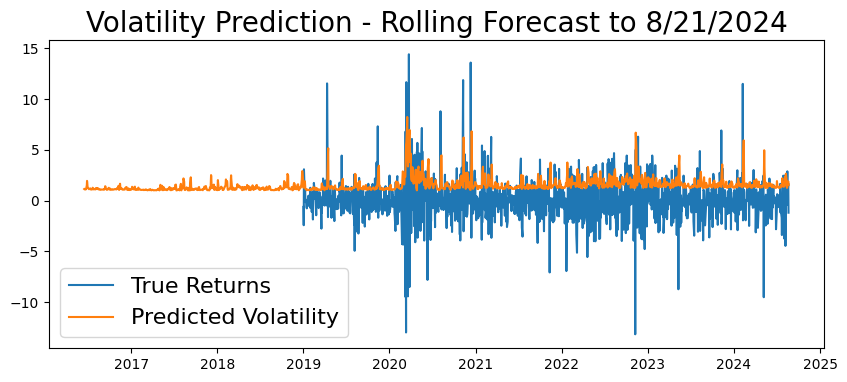

In [39]:
# Fit the ARCH(3) model
model = arch_model(returns, p=3, q=0)
model_fit = model.fit()
print(model_fit.summary())

# Calculate the number of days between 2019-01-01 and the last date in the returns data
start_date = pd.Timestamp('2019-01-01')
last_date = returns.index[-1]
test_size = (last_date - start_date).days

# Rolling forecast starting from 2019-01-01
rolling_predictions = []

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1, :][0]))

rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-test_size:])

# Extend the forecast to 8/21/2024
end_date = pd.Timestamp('2024-08-21')
extended_dates = pd.date_range(start=last_date + timedelta(days=1), end=end_date, freq='D')

# Forecasting into the future beyond the available data without altering returns
extended_predictions = []
for date in extended_dates:
    model = arch_model(returns, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    extended_predictions.append(np.sqrt(pred.variance.values[-1, :][0]))

# Combine rolling and extended predictions
combined_predictions = pd.concat([rolling_predictions, pd.Series(extended_predictions, index=extended_dates)])

# Plot the true returns and predicted volatility
plt.figure(figsize=(10, 4))
plt.plot(returns[start_date:], label='True Returns')
plt.plot(combined_predictions, label='Predicted Volatility')
plt.title('Volatility Prediction - Rolling Forecast to 8/21/2024', fontsize=20)
plt.legend(fontsize=16)
plt.show()

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

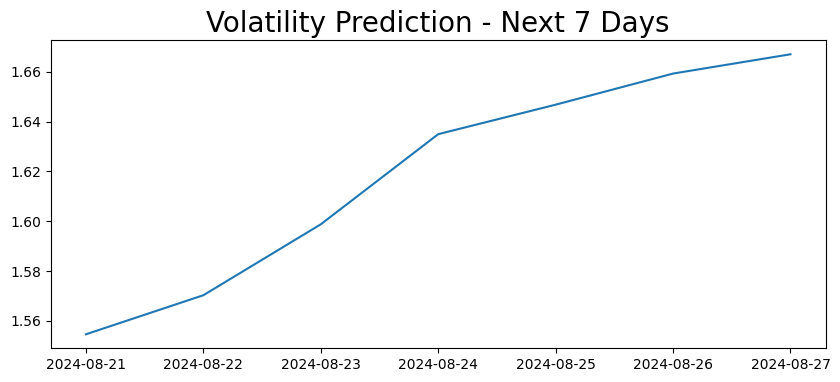

In [40]:
train = returns
model = arch_model(train, p=3, q=0)
model_fit = model.fit(disp='off')

pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)

[*********************100%%**********************]  1 of 1 completed


Text(0.5, 1.0, 'SPY Returns')

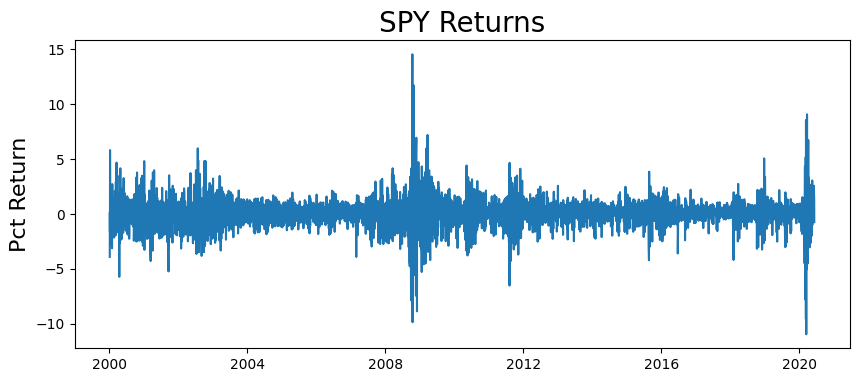

In [20]:
start = datetime(2000, 1, 1)
end = datetime(2020, 6, 10)

spy = yf.download('SPY', start=start, end=end)

returns = 100 * spy.Close.pct_change().dropna()

plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

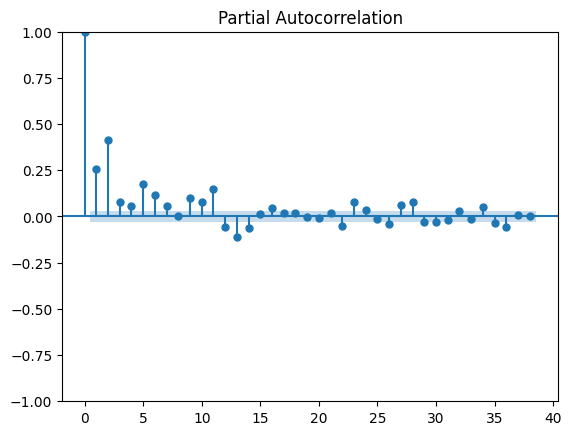

In [21]:
plot_pacf(returns**2)
plt.show()

In [22]:
model = arch_model(returns, p=2, q=2)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 95280.77096857691
Iteration:      2,   Func. Count:     20,   Neg. LLF: 56723.26815051847
Iteration:      3,   Func. Count:     31,   Neg. LLF: 11217.813674472683
Iteration:      4,   Func. Count:     40,   Neg. LLF: 13360.246391966703
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2148358317.8991895
Iteration:      6,   Func. Count:     57,   Neg. LLF: 7229.685842801886
Iteration:      7,   Func. Count:     65,   Neg. LLF: 7085.30443294476
Iteration:      8,   Func. Count:     73,   Neg. LLF: 7055.817061565789
Iteration:      9,   Func. Count:     82,   Neg. LLF: 7052.974273992688
Iteration:     10,   Func. Count:     90,   Neg. LLF: 7052.313034838404
Iteration:     11,   Func. Count:     97,   Neg. LLF: 7052.312559667162
Iteration:     12,   Func. Count:    104,   Neg. LLF: 7052.3125587591785
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7052.3125587591785
            Iterations: 

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7052.31
Distribution:                  Normal   AIC:                           14116.6
Method:            Maximum Likelihood   BIC:                           14155.9
                                        No. Observations:                 5140
Date:                Wed, Aug 21 2024   Df Residuals:                     5139
Time:                        13:52:57   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0664  1.096e-02      6.055  1.407e-09 [4.487e-02,8.783e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0406  9.950e-03      4.077  4.566e-05 [2.106e-02,6.007e-02]
alpha[1]       0.0809  2.203e-02      3.671  2.419e-04   [3.769e-02,  0.124]
alpha[2]       0.1328  3.069e-02      4.327  1.511e-05   [7.264e-02,  0.193]
beta[1]        0.3012      0.296      1.017      0.309     [ -0.279,  0.882]
beta[2]        0.4561      0.261      1.749  8.034e-02  [-5.510e-02,  0.967]
============================================================================

Covariance estimator: robust
"""

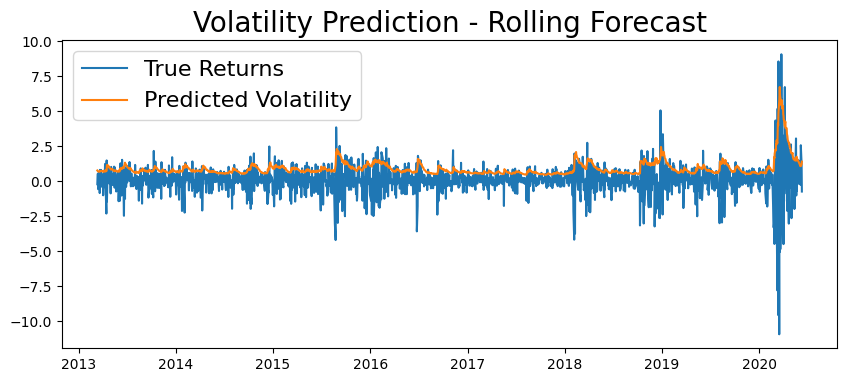

In [23]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

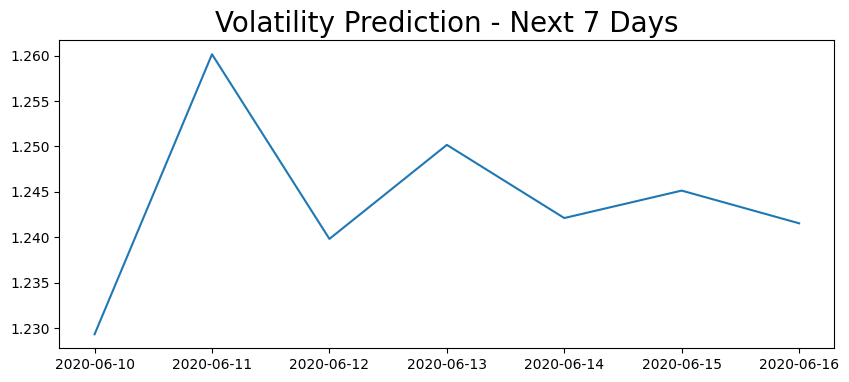

In [24]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)